In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

# importin input in X and output in Y
## convert 1D list to 2D list
## data.iloc[:,[0,1,2,...,]].values slicing the string i.e. selecting that columns

In [23]:
data=pd.read_csv("district wise rainfall normal.csv")
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18]].values
Y=data.iloc[:,[14]].values
Y=Y.reshape(-1,1)
print(X)

[['ANDAMAN And NICOBAR ISLANDS' 'NICOBAR' 107.3 ... 540.7 1207.2 892.1]
 ['ANDAMAN And NICOBAR ISLANDS' 'SOUTH ANDAMAN' 43.7 ... 483.5 1757.2
  705.3]
 ['ANDAMAN And NICOBAR ISLANDS' 'N & M ANDAMAN' 32.7 ... 405.6 1884.4
  574.7]
 ...
 ['KERALA' 'PATHANAMTHITTA' 19.8 ... 553.5 1715.7 624.2]
 ['KERALA' 'WAYANAD' 4.8 ... 275.4 2632.1 332.5]
 ['LAKSHADWEEP' 'LAKSHADWEEP' 20.8 ... 232.4 998.5 333.6]]


# Dealing with invalid dataset
### here SimpleImputer() function will replace NAN values with most frequent occuring value we can replace with mean values also

In [4]:
import sklearn as sk
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# Y=Y.reshape(-1,1)
# X=X.reshape(-1,1)
# Y.fillna(Y.mean(), inplace=True)
X=imputer.fit_transform(X)
Y=imputer.fit_transform(Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


## Encoding string or char into number
### lel=LabelEncoder() // inisialize object
### X[:,0]=lel.fit_transform(X[:,0]) //it will transform

In [24]:
from sklearn.preprocessing import LabelEncoder
lel=LabelEncoder() 
X[:,0]=lel.fit_transform(X[:,0]) 

lel2=LabelEncoder() # inisialize another  object
X[:,1]=lel2.fit_transform(X[:,1]) 
print(X)

[[0 423 107.3 ... 540.7 1207.2 892.1]
 [0 553 43.7 ... 483.5 1757.2 705.3]
 [0 396 32.7 ... 405.6 1884.4 574.7]
 ...
 [17 447 19.8 ... 553.5 1715.7 624.2]
 [17 620 4.8 ... 275.4 2632.1 332.5]
 [18 341 20.8 ... 232.4 998.5 333.6]]


# Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
sc1=StandardScaler()
Y=sc1.fit_transform(Y)
Y=Y.ravel()

# Splitting Dataset into Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(Y_train)

[ 3.64476494e+00 -6.93930732e-01 -7.68373816e-01 -8.35658912e-01
  5.70050809e-01  2.08480056e+00 -6.43109011e-01  1.75064178e+00
 -4.57001299e-01 -4.81696361e-01 -5.78687110e-01 -1.17196509e+00
  2.44854570e+00  2.65386068e+00 -7.73623008e-01 -6.36070321e-01
 -2.79721774e-01 -8.43532700e-01 -4.60341694e-01 -2.69223390e-01
 -4.00095287e-01 -1.07079885e+00 -8.55104782e-01 -9.24537274e-01
  2.83850552e-01 -7.47973548e-01 -1.03310011e+00  3.74279812e-01
 -8.16332342e-01 -2.09096283e-01 -1.40737489e-01 -9.69155405e-01
 -2.85925364e-01  5.44282049e-01 -8.36136111e-01 -1.64239553e-01
 -5.36335676e-01 -6.77586657e-01 -4.96608838e-01  2.25512943e-01
 -3.64543942e-01  1.51904957e-01 -8.69420760e-01 -8.62382071e-01
 -6.40277082e-02  5.46756078e-02 -5.69023825e-01 -5.04275293e-02
  8.98377858e-03 -4.95654439e-01 -1.91709778e-02  8.02685448e-01
 -3.04297536e-01 -6.82835849e-01  8.64093586e-02 -7.46780550e-01
 -2.42500232e-01  1.22676502e-01 -7.80542397e-01  5.74921368e+00
 -2.81988470e-01 -1.84401

In [8]:
def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list

# Training model

In [9]:
from sklearn.ensemble import RandomForestRegressor
# print(Y_train)
classifier=RandomForestRegressor(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)
classifier.score(X_train,Y_train)


0.9614350402649715

In [19]:
print(classifier.score(X_test,Y_test))

print(Y_test)

0.9614350402649715
[[ 1.91393196e-01]
 [-6.47435071e-02]
 [-9.63190414e-01]
 [-1.01845750e-01]
 [ 1.87814201e-01]
 [-5.89304794e-01]
 [-2.43008698e-02]
 [-6.33087826e-01]
 [-8.72911722e-02]
 [-2.17566570e-01]
 [-1.10611159e+00]
 [-5.48265658e-01]
 [ 1.22536469e+00]
 [-1.78674831e-01]
 [ 7.70474498e-01]
 [-7.71356312e-01]
 [-3.16824016e-01]
 [ 9.69077423e-02]
 [-6.31059729e-01]
 [ 8.87149717e-01]
 [-9.23105676e-01]
 [-1.24712397e+00]
 [-1.79779796e-02]
 [-6.30224631e-01]
 [ 1.50680692e-02]
 [-2.22935062e-01]
 [-3.32213692e-01]
 [ 2.53348717e+00]
 [ 1.94821623e-02]
 [ 7.01760931e+00]
 [ 1.39059494e+00]
 [-4.23239451e-01]
 [ 1.44046226e+00]
 [-6.79972653e-01]
 [-7.34969868e-01]
 [-7.52506941e-01]
 [-1.05039858e+00]
 [-2.03369892e-01]
 [ 4.12694353e-01]
 [-5.35381278e-01]
 [-2.07187486e-01]
 [ 2.43029283e+00]
 [-9.23702176e-01]
 [-6.30582530e-01]
 [-3.14795919e-01]
 [ 1.32760463e+00]
 [ 4.53702222e-02]
 [-1.02749301e+00]
 [ 1.92243351e+00]
 [ 1.43914996e+00]
 [ 1.32760463e+00]
 [-6.0839276

In [11]:
Y_pred=classifier.predict(X_test)
Y_pred=Y_pred.reshape(-1,1)
print(Y_pred)
Y_test=Y_test.reshape(-1,1)
print(Y_test)


[[ 1.61663682e-01]
 [-1.10168354e-02]
 [-9.24428711e-01]
 [-5.89598521e-02]
 [-7.09840804e-02]
 [-5.74111962e-01]
 [-4.24776390e-03]
 [-6.26886622e-01]
 [-6.81864998e-02]
 [-2.03847091e-01]
 [-1.08147857e+00]
 [-5.07959022e-01]
 [ 1.33244582e+00]
 [-2.08221816e-01]
 [ 7.55463002e-01]
 [-6.67380558e-01]
 [-2.90210614e-01]
 [ 1.12153066e-01]
 [-5.83634474e-01]
 [ 8.84385541e-01]
 [-8.24206130e-01]
 [-1.26460498e+00]
 [-1.00015940e-02]
 [-6.60970579e-01]
 [ 8.08332852e-02]
 [-2.20083796e-01]
 [-2.99736704e-01]
 [ 2.31060171e+00]
 [ 9.06456950e-02]
 [ 4.87509678e+00]
 [ 1.31610652e+00]
 [-4.08866210e-01]
 [ 1.62323316e+00]
 [-6.60977737e-01]
 [-7.18884674e-01]
 [-7.25988978e-01]
 [-1.05719151e+00]
 [-1.96508960e-01]
 [ 4.09201254e-01]
 [-5.35905004e-01]
 [-2.22960115e-01]
 [ 2.39181386e+00]
 [-8.12393062e-01]
 [-5.95727896e-01]
 [-3.35402577e-01]
 [ 1.50385460e+00]
 [ 8.78194824e-02]
 [-9.95053009e-01]
 [ 1.77985830e+00]
 [ 8.68663018e-01]
 [ 1.50198756e+00]
 [-5.86171981e-01]
 [-4.7338235

### If we want to encode your data as prevous then you have to write code like :-
### Y_pred=lel(Or any object you used).inverse_transform(Y_pred)

# make table and concatenate

In [12]:
df=np.concatenate((Y_test,Y_pred),axis=1)
dataframe=pd.DataFrame(df,columns=['Rain on Tommorow',"Prediction of Rain"])
print(dataframe)

     Rain on Tommorow  Prediction of Rain
0            0.191393            0.161664
1           -0.064744           -0.011017
2           -0.963190           -0.924429
3           -0.101846           -0.058960
4            0.187814           -0.070984
..                ...                 ...
124          2.423254            2.471003
125         -0.352495           -0.337342
126         -0.715643           -0.716223
127          0.340279            0.382637
128         -0.549817           -0.542566

[129 rows x 2 columns]


# If we want to convert into csv file

In [13]:
dataframe.to_csv('Rain Prediction.csv')

# Calculating Accuracy of prediction

In [14]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9614350402649715

# Plot or graphically visualization Prediction vs Test Data

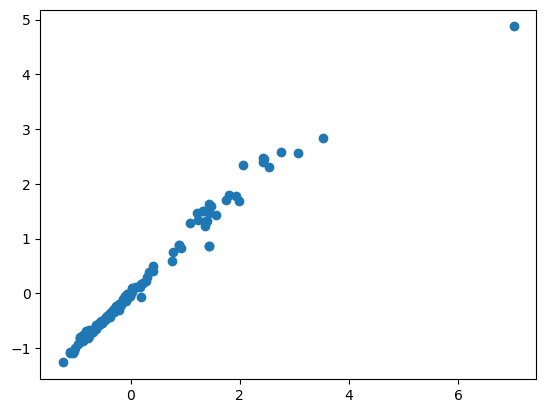

In [15]:
import matplotlib.pyplot as plt
# plt.plot(Y_test,Y_pred)
plt.scatter(Y_test,Y_pred)
# plt.bar(Y_test,Y_pred)
plt.show()

In [16]:
# y=Y_pred.ravel()
# plt.pie(y)

# Prediction for one input value

In [25]:
input_data=(0,423,107.3,57.9,65.2,117,358.5,295.5,285,271.9,354.8,326,315.2,250.9,165.2,540.7,1207.2,892.1
)
# change data into array
arrayed_data=np.asarray(input_data)
# reshape the array as we are predicting for only one intance
arraye_data_reshaped=arrayed_data.reshape(1,-1)
prediction=classifier.predict(arraye_data_reshaped)
print(prediction)


[5.00922317]
